In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

In [3]:
data = pd.read_hdf('filtered_data.h5', parse_dates=[0], index_col=[0])

In [4]:
data.head()

putIV   call_IV   close     volume    return  \
date       secid                                                       
1996-01-04 100930.0  0.205022  0.191991  67.000  3834800.0 -0.021898   
           100972.0  0.251196  0.252551  42.500  1420100.0  0.014925   
           101387.0  0.195254  0.183102  95.375   589900.0 -0.006510   
           101397.0  0.198617  0.202909  94.125   976000.0  0.001330   
           101730.0  0.436135  0.421977  59.125     4400.0 -0.004211   

                        shrout     low    high    market_cap  
date       secid                                              
1996-01-04 100930.0  5306210.0  66.750  68.500  3.555161e+08  
           100972.0   790444.0  41.875  42.750  3.359387e+07  
           101387.0   312711.0  95.125  97.875  2.982481e+07  
           101397.0   474092.0  93.125  94.375  4.462391e+07  
           101730.0   945484.0  59.125  59.375  5.590174e+07

In [5]:
data = data.apply(pd.to_numeric, errors='coerce')
data.dtypes

putIV         float64
call_IV       float64
close         float64
volume        float64
return        float64
shrout        float64
low           float64
high          float64
market_cap    float64
dtype: object

We will start of by calculating daily realized variance. 
- Since we don't have minute data we will use 
($P_{high} - P_{low} / P_{close}$)^2 /[2.39] 

In [6]:
data['realizedvar'] = (((data['high'] - data['low'])/data['close'])**2)/2.39
data.head()

putIV   call_IV   close     volume    return  \
date       secid                                                       
1996-01-04 100930.0  0.205022  0.191991  67.000  3834800.0 -0.021898   
           100972.0  0.251196  0.252551  42.500  1420100.0  0.014925   
           101387.0  0.195254  0.183102  95.375   589900.0 -0.006510   
           101397.0  0.198617  0.202909  94.125   976000.0  0.001330   
           101730.0  0.436135  0.421977  59.125     4400.0 -0.004211   

                        shrout     low    high    market_cap  realizedvar  
date       secid                                                           
1996-01-04 100930.0  5306210.0  66.750  68.500  3.555161e+08     0.000285  
           100972.0   790444.0  41.875  42.750  3.359387e+07     0.000177  
           101387.0   312711.0  95.125  97.875  2.982481e+07     0.000348  
           101397.0   474092.0  93.125  94.375  4.462391e+07     0.000074  
           101730.0   945484.0  59.125  59.375  5.590174e+07     0.000007

Now, we will calculate the impliedVol as the average of the putIV and callIV 

In [7]:
data['impliedvol'] = (data['putIV'] + data['call_IV'])/2
data.head()

putIV   call_IV   close     volume    return  \
date       secid                                                       
1996-01-04 100930.0  0.205022  0.191991  67.000  3834800.0 -0.021898   
           100972.0  0.251196  0.252551  42.500  1420100.0  0.014925   
           101387.0  0.195254  0.183102  95.375   589900.0 -0.006510   
           101397.0  0.198617  0.202909  94.125   976000.0  0.001330   
           101730.0  0.436135  0.421977  59.125     4400.0 -0.004211   

                        shrout     low    high    market_cap  realizedvar  \
date       secid                                                            
1996-01-04 100930.0  5306210.0  66.750  68.500  3.555161e+08     0.000285   
           100972.0   790444.0  41.875  42.750  3.359387e+07     0.000177   
           101387.0   312711.0  95.125  97.875  2.982481e+07     0.000348   
           101397.0   474092.0  93.125  94.375  4.462391e+07     0.000074   
           101730.0   945484.0  59.125  59.375  5.590174e+07     0.000007   

                     impliedvol  
date       secid                 
1996-01-04 100930.0    0.198506  
           100972.0    0.251874  
           101387.0    0.189178  
           101397.0    0.200763  
           101730.0    0.429056

Calculating Variance Risk Premium as the difference between the Implied vol and realized var 

In [8]:
data['varianceRP'] = data['impliedvol'] - data['realizedvar']
data.head()

putIV   call_IV   close     volume    return  \
date       secid                                                       
1996-01-04 100930.0  0.205022  0.191991  67.000  3834800.0 -0.021898   
           100972.0  0.251196  0.252551  42.500  1420100.0  0.014925   
           101387.0  0.195254  0.183102  95.375   589900.0 -0.006510   
           101397.0  0.198617  0.202909  94.125   976000.0  0.001330   
           101730.0  0.436135  0.421977  59.125     4400.0 -0.004211   

                        shrout     low    high    market_cap  realizedvar  \
date       secid                                                            
1996-01-04 100930.0  5306210.0  66.750  68.500  3.555161e+08     0.000285   
           100972.0   790444.0  41.875  42.750  3.359387e+07     0.000177   
           101387.0   312711.0  95.125  97.875  2.982481e+07     0.000348   
           101397.0   474092.0  93.125  94.375  4.462391e+07     0.000074   
           101730.0   945484.0  59.125  59.375  5.590174e+07     0.000007   

                     impliedvol  varianceRP  
date       secid                             
1996-01-04 100930.0    0.198506    0.198221  
           100972.0    0.251874    0.251696  
           101387.0    0.189178    0.188830  
           101397.0    0.200763    0.200689  
           101730.0    0.429056    0.429049

Similarly we will calculat Volatility Risk Premium, which uses the sqaure root of IV and RV

In [9]:
data['volRP'] = (data['impliedvol']**0.5) - (data['realizedvar']**0.5)
data.tail()

putIV   call_IV  close     volume    return  \
date       secid                                                      
2017-12-29 208313.0  0.197772  0.216075  14.36  7097200.0 -0.017112   
           208827.0  0.495906  0.520445  97.72    55196.0 -0.001329   
           209324.0  0.615499  0.818704   5.68   248739.0 -0.018998   
           209612.0  0.170738  0.188251  72.35   843005.0 -0.002069   
           211899.0  0.160968  0.191165  71.22  4745557.0 -0.004055   

                         shrout    low    high    market_cap  realizedvar  \
date       secid                                                            
2017-12-29 208313.0   1593886.0  14.36  14.670  2.288820e+07     0.000195   
           208827.0    591072.0  97.57  99.755  5.775956e+07     0.000209   
           209324.0  49092770.0   5.68   5.910  2.788469e+08     0.000686   
           209612.0    347559.0  72.35  73.000  2.514589e+07     0.000034   
           211899.0   2339990.0  71.22  71.850  1.666541e+08     0.000033   

                     impliedvol  varianceRP     volRP  
date       secid                                       
2017-12-29 208313.0    0.206923    0.206729  0.440924  
           208827.0    0.508176    0.507966  0.698401  
           209324.0    0.717102    0.716415  0.820626  
           209612.0    0.179495    0.179461  0.417857  
           211899.0    0.176067    0.176034  0.413881

Finally, we will calculate the volatility spread, which is the difference between the CallIV and the PutIV

In [10]:
data['volspread'] = data['call_IV'] - data['putIV']
data.head()

putIV   call_IV   close     volume    return  \
date       secid                                                       
1996-01-04 100930.0  0.205022  0.191991  67.000  3834800.0 -0.021898   
           100972.0  0.251196  0.252551  42.500  1420100.0  0.014925   
           101387.0  0.195254  0.183102  95.375   589900.0 -0.006510   
           101397.0  0.198617  0.202909  94.125   976000.0  0.001330   
           101730.0  0.436135  0.421977  59.125     4400.0 -0.004211   

                        shrout     low    high    market_cap  realizedvar  \
date       secid                                                            
1996-01-04 100930.0  5306210.0  66.750  68.500  3.555161e+08     0.000285   
           100972.0   790444.0  41.875  42.750  3.359387e+07     0.000177   
           101387.0   312711.0  95.125  97.875  2.982481e+07     0.000348   
           101397.0   474092.0  93.125  94.375  4.462391e+07     0.000074   
           101730.0   945484.0  59.125  59.375  5.590174e+07     0.000007   

                     impliedvol  varianceRP     volRP  volspread  
date       secid                                                  
1996-01-04 100930.0    0.198506    0.198221  0.428645  -0.013031  
           100972.0    0.251874    0.251696  0.488553   0.001355  
           101387.0    0.189178    0.188830  0.416295  -0.012152  
           101397.0    0.200763    0.200689  0.439476   0.004292  
           101730.0    0.429056    0.429049  0.652289  -0.014158

Since we have all our variables calculated we can drop the putIV, CallIV, Close, low, high, shrout and volume column 

In [11]:
data1 = data[['return', 'market_cap', 'realizedvar', 'impliedvol', 'varianceRP', 'volRP','volspread']]

In [12]:
data1.head()

return    market_cap  realizedvar  impliedvol  \
date       secid                                                       
1996-01-04 100930.0 -0.021898  3.555161e+08     0.000285    0.198506   
           100972.0  0.014925  3.359387e+07     0.000177    0.251874   
           101387.0 -0.006510  2.982481e+07     0.000348    0.189178   
           101397.0  0.001330  4.462391e+07     0.000074    0.200763   
           101730.0 -0.004211  5.590174e+07     0.000007    0.429056   

                     varianceRP     volRP  volspread  
date       secid                                      
1996-01-04 100930.0    0.198221  0.428645  -0.013031  
           100972.0    0.251696  0.488553   0.001355  
           101387.0    0.188830  0.416295  -0.012152  
           101397.0    0.200689  0.439476   0.004292  
           101730.0    0.429049  0.652289  -0.014158

Now we will split the data into two samples. 
1. In sample: 1996:2013
2. Out of Sample: 2014:2017

In [13]:
sample = data1.loc['1996-01-04':'2013-12-31']
test = data1.loc['2014-01-01':'2018-12-31']

In [14]:
#Number of companies in sample dataset 

num_of_companies = sample.index.unique(level = 'secid')
len(num_of_companies)

747

In [15]:
#Number of companies in test data set 

num_of_companies = test.index.unique(level = 'secid')
len(num_of_companies)

579

In [16]:
sample.tail()

return   market_cap  realizedvar  impliedvol  \
date       secid                                                      
2013-12-31 156324.0  0.010653  26033324.76     0.000284    0.580949   
           160586.0 -0.003773  84013422.22     0.000074    0.226822   
           166890.0  0.016068  42270763.00     0.000371    0.558466   
           189705.0  0.051892  34669964.05     0.001316    0.997528   
           189909.0  0.016446  21907683.75     0.000229    0.303453   

                     varianceRP     volRP  volspread  
date       secid                                      
2013-12-31 156324.0    0.580665  0.745348   0.007316  
           160586.0    0.226748  0.467684  -0.002325  
           166890.0    0.558095  0.728051  -0.007143  
           189705.0    0.996212  0.962483  -0.023170  
           189909.0    0.303225  0.535749   0.032643

In [17]:
test.tail()

return    market_cap  realizedvar  impliedvol  \
date       secid                                                       
2017-12-29 208313.0 -0.017112  2.288820e+07     0.000195    0.206923   
           208827.0 -0.001329  5.775956e+07     0.000209    0.508176   
           209324.0 -0.018998  2.788469e+08     0.000686    0.717102   
           209612.0 -0.002069  2.514589e+07     0.000034    0.179495   
           211899.0 -0.004055  1.666541e+08     0.000033    0.176067   

                     varianceRP     volRP  volspread  
date       secid                                      
2017-12-29 208313.0    0.206729  0.440924   0.018303  
           208827.0    0.507966  0.698401   0.024539  
           209324.0    0.716415  0.820626   0.203205  
           209612.0    0.179461  0.417857   0.017513  
           211899.0    0.176034  0.413881   0.030197

Data analysis: only for the sample data 
1. Check the range of the data to make sure there are no abnormal values   
2. Correlation screening  
3. Factor selection and model creation 

In [18]:
sample.describe()

,return,market_cap,realizedvar,impliedvol,varianceRP,volRP,volspread
count,970822.000000,9.708290e+05,970829.000000,968186.000000,968186.000000,968186.000000,968186.000000
mean,0.000808,1.424350e+08,0.000421,0.331450,0.331031,0.545903,-0.006504
std,0.023837,5.959880e+08,0.002013,0.159513,0.158976,0.117336,0.056401
min,-0.579032,2.000004e+07,0.000000,0.014299,-0.238903,-0.226110,-2.330309
25%,-0.009961,2.842124e+07,0.000075,0.225575,0.225414,0.463940,-0.013640
50%,0.000371,4.552762e+07,0.000164,0.296554,0.296291,0.530311,-0.003925
75%,0.011121,9.176584e+07,0.000380,0.393032,0.392584,0.608056,0.003783
max,1.874146,1.925729e+10,0.448727,2.991919,2.991830,1.720291,2.556851


In [19]:
#This is the max retrurn that seems to be either in percentage terms or just incorrect. 
sample['return'].idxmax(axis=0)

('2007-03-12', '120926.0')

After analyzing this SEC id number, wehave decided that it is best to drop it. 

In [20]:
sample.drop(['120926.0'], axis = 0, level = 'secid', inplace=True)

/usr/local/lib/python3.7/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [21]:
sample.describe()

,return,market_cap,realizedvar,impliedvol,varianceRP,volRP,volspread
count,969965.000000,9.699720e+05,969972.000000,967329.000000,967329.000000,967329.000000,967329.000000
mean,0.000806,1.425056e+08,0.000420,0.331283,0.330865,0.545778,-0.006493
std,0.023752,5.962463e+08,0.002013,0.159423,0.158886,0.117271,0.056381
min,-0.579032,2.000004e+07,0.000000,0.014299,-0.238903,-0.226110,-2.330309
25%,-0.009957,2.840968e+07,0.000075,0.225519,0.225367,0.463888,-0.013624
50%,0.000372,4.548693e+07,0.000164,0.296442,0.296193,0.530216,-0.003921
75%,0.011119,9.183020e+07,0.000380,0.392737,0.392270,0.607839,0.003783
max,0.683280,1.925729e+10,0.448727,2.991919,2.991830,1.720291,2.556851


The numbers look much more decent now with a few outliers, which is expected with daily data. 

Next thing to see is how these variables are correlated to one another. We will look at specific correlation for each SECID. 

First step is to sort by secid and then dates 

In [22]:
sample = sample.sort_values(by = ['secid', 'date'], ascending =[True, True])
sample.head()

,,return,market_cap,realizedvar,impliedvol,varianceRP,volRP,volspread
date,secid,,,,,,,
2000-05-25,100871.0,0.069697,2.023663e+07,0.003022,0.691643,0.688621,0.776678,-0.014494
2000-05-30,100871.0,0.086567,2.086723e+07,0.001263,0.725345,0.724081,0.816131,-0.022913
2000-05-31,100871.0,-0.015568,2.054238e+07,0.003065,0.715463,0.712398,0.790492,-0.017714
2000-06-01,100871.0,0.058605,2.735901e+07,0.000684,0.705148,0.704464,0.813584,-0.001820
2000-06-02,100871.0,0.057996,2.894574e+07,0.000462,0.708371,0.707909,0.820158,-0.012988


Also, an important thing to note is that the data is not of equal length for each secid, however this doesn't matter because our strategy should adjust for new stocks in the data. 

Correlatio between Variance Risk Prem and Volatility spread across different secid's

In [23]:
corr = sample.groupby('secid')[['varianceRP','volspread']].corr()
corr = corr[corr['varianceRP']<1]
corr.describe()

,varianceRP,volspread
count,720.000000,720.0
mean,-0.022411,1.0
std,0.218874,0.0
min,-1.000000,1.0
25%,-0.106271,1.0
50%,-0.026437,1.0
75%,0.055571,1.0
max,0.998971,1.0


On average it looks like the correaltion is not that strong, however in some cases it looks like the correaltion is almost 1 or -1, we will keep this data and continue working with it. 

Now looking at the correaltion of all the columns grouped by secid

In [237]:
corr1 = sample.groupby('secid').corr()
corr1.head(10)

return  market_cap  realizedvar  impliedvol  \
secid                                                                 
100871.0 return       1.000000    0.059759     0.134692    0.075559   
         market_cap   0.059759    1.000000    -0.303738   -0.737753   
         realizedvar  0.134692   -0.303738     1.000000    0.251252   
         impliedvol   0.075559   -0.737753     0.251252    1.000000   
         varianceRP   0.072939   -0.734916     0.230127    0.999763   
         volRP        0.015867   -0.625036    -0.129511    0.923605   
         volspread    0.257684    0.338939    -0.147527   -0.247390   
         cum_VRP      0.124495   -0.332305    -0.044381    0.522378   
         MOM_VRP     -0.118972   -0.267452     0.051763    0.526405   
         cum_VSP     -0.002801    0.641769    -0.118600   -0.771764   

                      varianceRP     volRP  volspread   cum_VRP   MOM_VRP  \
secid                                                                       
100871.0 return         0.072939  0.015867   0.257684  0.124495 -0.118972   
         market_cap    -0.734916 -0.625036   0.338939 -0.332305 -0.267452   
         realizedvar    0.230127 -0.129511  -0.147527 -0.044381  0.051763   
         impliedvol     0.999763  0.923605  -0.247390  0.522378  0.526405   
         varianceRP     1.000000  0.931515  -0.245412  0.526204  0.528091   
         volRP          0.931515  1.000000  -0.198351  0.530277  0.516708   
         volspread     -0.245412 -0.198351   1.000000 -0.193168 -0.050675   
         cum_VRP        0.526204  0.530277  -0.193168  1.000000  0.201753   
         MOM_VRP        0.528091  0.516708  -0.050675  0.201753  1.000000   
         cum_VSP       -0.773275 -0.730323   0.414851 -0.647556 -0.622951   

                       cum_VSP   MOM_VSP   returns  
secid                                               
100871.0 return      -0.002801 -0.118170  1.000000  
         market_cap   0.641769  0.472131  0.059759  
         realizedvar -0.118600 -0.042816  0.134692  
         impliedvol  -0.771764 -0.644621  0.075559  
         varianceRP  -0.773275 -0.647147  0.072939  
         volRP       -0.730323 -0.629219  0.015867  
         volspread    0.414851  0.250345  0.257684  
         cum_VRP     -0.647556 -0.723961  0.124495  
         MOM_VRP     -0.622951 -0.482208 -0.118972  
         cum_VSP      1.000000  0.829886 -0.002801

In [239]:
corr_returns = corr1['return']
corr_returns  = corr_returns.unstack()
corr_returns.head()

        secid   
return  100871.0    0.208421
        100880.0    0.225210
        100892.0    0.277986
        100900.0    0.193051
        100906.0    0.161605
dtype: float64

In [26]:
corr_returns.describe()

,return,market_cap,realizedvar,impliedvol,varianceRP,volRP,volspread
count,723.0,723.000000,723.000000,722.000000,722.000000,722.000000,721.000000
mean,1.0,0.059662,0.001995,-0.050003,-0.050180,-0.059677,-0.147871
std,0.0,0.165315,0.230357,0.170992,0.170081,0.159908,0.182336
min,1.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,1.0,0.011848,-0.093557,-0.088665,-0.087815,-0.084583,-0.226637
50%,1.0,0.029624,-0.021835,-0.047412,-0.047654,-0.046570,-0.139252
75%,1.0,0.058481,0.069134,-0.015847,-0.016164,-0.017578,-0.074321
max,1.0,1.000000,1.000000,1.000000,1.000000,0.997606,1.000000


In [27]:
corr_marketcap = corr1['market_cap']
corr_marketcap  = corr_marketcap.unstack()
corr_marketcap.describe()

,return,market_cap,realizedvar,impliedvol,varianceRP,volRP,volspread
count,723.000000,723.0,723.000000,722.000000,722.000000,722.000000,721.000000
mean,0.059662,1.0,-0.082227,-0.170017,-0.169462,-0.159671,-0.003935
std,0.165315,0.0,0.205956,0.402171,0.401690,0.405488,0.193611
min,-1.000000,1.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,0.011848,1.0,-0.182627,-0.480061,-0.480702,-0.486989,-0.065390
50%,0.029624,1.0,-0.084489,-0.216382,-0.216403,-0.206942,0.003176
75%,0.058481,1.0,0.018083,0.120277,0.120428,0.146151,0.079938
max,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000


In [28]:
#Lagging all the variables by 1 day 

sample['realizedvar'] = sample['realizedvar'].groupby('secid').shift()
sample['impliedvol'] = sample['impliedvol'].groupby('secid').shift()
sample['varianceRP'] = sample['varianceRP'].groupby('secid').shift()
sample['volRP'] = sample['volRP'].groupby('secid').shift()
sample['volspread'] = sample['volspread'].groupby('secid').shift()
sample.head()

,,return,market_cap,realizedvar,impliedvol,varianceRP,volRP,volspread
date,secid,,,,,,,
2000-05-25,100871.0,0.069697,2.023663e+07,NaN,NaN,NaN,NaN,NaN
2000-05-30,100871.0,0.086567,2.086723e+07,0.003022,0.691643,0.688621,0.776678,-0.014494
2000-05-31,100871.0,-0.015568,2.054238e+07,0.001263,0.725345,0.724081,0.816131,-0.022913
2000-06-01,100871.0,0.058605,2.735901e+07,0.003065,0.715463,0.712398,0.790492,-0.017714
2000-06-02,100871.0,0.057996,2.894574e+07,0.000684,0.705148,0.704464,0.813584,-0.001820


In [29]:
#Dropping NAN

sample = sample.dropna()
sample.head()

,,return,market_cap,realizedvar,impliedvol,varianceRP,volRP,volspread
date,secid,,,,,,,
2000-05-30,100871.0,0.086567,2.086723e+07,0.003022,0.691643,0.688621,0.776678,-0.014494
2000-05-31,100871.0,-0.015568,2.054238e+07,0.001263,0.725345,0.724081,0.816131,-0.022913
2000-06-01,100871.0,0.058605,2.735901e+07,0.003065,0.715463,0.712398,0.790492,-0.017714
2000-06-02,100871.0,0.057996,2.894574e+07,0.000684,0.705148,0.704464,0.813584,-0.001820
2000-06-05,100871.0,-0.036545,2.788792e+07,0.000462,0.708371,0.707909,0.820158,-0.012988


In [30]:
#Creating momentum in VolRP 

sample['cum_VRP'] = 1 + sample['volRP']
sample['cum_VRP'] = sample.groupby('secid')['cum_VRP'].cumprod()
sample['MOM_VRP'] = (sample.groupby('secid')['cum_VRP'].shift(2)/sample.groupby('secid')['cum_VRP'].shift(10))-1
sample.tail()

,,return,market_cap,realizedvar,impliedvol,varianceRP,volRP,volspread,cum_VRP,MOM_VRP
date,secid,,,,,,,,,
2000-06-26,9554.0,0.018207,4.613587e+07,0.000739,0.501846,0.501107,0.681232,-0.006513,3.252188e+125,63.398565
2000-06-27,9554.0,-0.046768,4.397821e+07,0.000366,0.536317,0.535951,0.713207,0.033348,5.571671e+125,62.777309
2000-06-28,9554.0,-0.034632,4.245516e+07,0.002732,0.528490,0.525758,0.674703,0.009162,9.330893e+125,63.407964
2000-06-29,9554.0,-0.017190,4.172536e+07,0.001810,0.517122,0.515312,0.676569,-0.002075,1.564388e+126,64.321397
2000-06-30,9554.0,0.043346,4.353399e+07,0.000468,0.522989,0.522520,0.701536,0.000449,2.661863e+126,64.106872


In [31]:
#Creating Momentum in VolSpread 

sample['cum_VSP'] = 1 + sample['volspread']
sample['cum_VSP'] = sample.groupby('secid')['cum_VSP'].cumprod()
sample['MOM_VSP'] = (sample.groupby('secid')['cum_VSP'].shift(2)/sample.groupby('secid')['cum_VSP'].shift(10))-1
sample.tail()

,,return,market_cap,realizedvar,impliedvol,varianceRP,volRP,volspread,cum_VRP,MOM_VRP,cum_VSP,MOM_VSP
date,secid,,,,,,,,,,,
2000-06-26,9554.0,0.018207,4.613587e+07,0.000739,0.501846,0.501107,0.681232,-0.006513,3.252188e+125,63.398565,0.054247,0.051317
2000-06-27,9554.0,-0.046768,4.397821e+07,0.000366,0.536317,0.535951,0.713207,0.033348,5.571671e+125,62.777309,0.056056,0.044437
2000-06-28,9554.0,-0.034632,4.245516e+07,0.002732,0.528490,0.525758,0.674703,0.009162,9.330893e+125,63.407964,0.056570,0.026583
2000-06-29,9554.0,-0.017190,4.172536e+07,0.001810,0.517122,0.515312,0.676569,-0.002075,1.564388e+126,64.321397,0.056453,0.043062
2000-06-30,9554.0,0.043346,4.353399e+07,0.000468,0.522989,0.522520,0.701536,0.000449,2.661863e+126,64.106872,0.056478,0.035583


Before sorting the data, we will run a regression in the same way as fama macbeth to test for causality, however we will be running taking the average of firm level regression rather than taking the average of the time series.  

we will run the following regressions: 
1. VarianceRP and VolSpread 
2. VolRP and Volspread 
3. Market_cap, VOl_spread and VolRP 
4. momentum in VarianceRP and Momentum in Volspread 

In [32]:
#Creating a function for groupby regression 

def regfun(df, mod):
    results = smf.ols(mod, data=df).fit()
    return results.params

In [33]:
sample['returns'] = sample['return'].astype('float64')

Regression 1 

In [34]:
params1 = sample.groupby('date').apply(regfun, 'returns ~ varianceRP + volspread')

In [35]:
stats = params1.describe()
stats.loc['stderr'] = stats.loc['std'] / np.sqrt(stats.loc['count'])
stats.loc['tstat']  = stats.loc['mean'] / stats.loc['stderr']
print(stats)

          Intercept   varianceRP    volspread
count   4529.000000  4529.000000  4529.000000
mean      -0.000248     0.002756     0.017900
std        0.013684     0.049078     0.058226
min       -0.122435    -0.217113    -0.477113
25%       -0.006702    -0.025724    -0.012656
50%        0.000109     0.003475     0.011462
75%        0.006584     0.031342     0.042950
max        0.111054     0.341309     0.388972
stderr     0.000203     0.000729     0.000865
tstat     -1.217270     3.778569    20.689252


The beta values are significant and show a positive realtionship with returns  

Regression 2:

In [36]:
params2 = sample.groupby('date').apply(regfun, 'returns ~ volRP + volspread')

In [37]:
stats2 = params2.describe()
stats2.loc['stderr'] = stats2.loc['std'] / np.sqrt(stats2.loc['count'])
stats2.loc['tstat']  = stats2.loc['mean'] / stats2.loc['stderr']
print(stats2)

          Intercept        volRP    volspread
count   4529.000000  4529.000000  4529.000000
mean      -0.001491     0.003849     0.017780
std        0.033672     0.067966     0.058011
min       -0.374754    -0.373217    -0.477198
25%       -0.015174    -0.031507    -0.011907
50%       -0.000801     0.004502     0.010754
75%        0.013299     0.038345     0.042019
max        0.253173     0.636863     0.384558
stderr     0.000500     0.001010     0.000862
tstat     -2.980707     3.811540    20.626541


We actually get a significant alpha by running the regression with Vol Spread 

Regression 3

In [38]:
params3 = sample.groupby('date').apply(regfun, 'returns ~ market_cap + volRP + volspread')

stats3 = params3.describe()
stats3.loc['stderr'] = stats3.loc['std'] / np.sqrt(stats3.loc['count'])
stats3.loc['tstat']  = stats3.loc['mean'] / stats3.loc['stderr']
print(stats3)


          Intercept    market_cap        volRP    volspread
count   4529.000000  4.529000e+03  4529.000000  4529.000000
mean      -0.001458  9.111403e-14     0.003775     0.017890
std        0.033946  1.068194e-11     0.068055     0.057797
min       -0.379760 -7.419339e-11    -0.377268    -0.477007
25%       -0.015124 -3.010298e-12    -0.031388    -0.011817
50%       -0.000833 -3.079757e-14     0.004364     0.010919
75%        0.013363  3.192585e-12     0.038228     0.041775
max        0.260525  6.463436e-11     0.639676     0.375121
stderr     0.000504  1.587263e-13     0.001011     0.000859
tstat     -2.889980  5.740325e-01     3.732715    20.830425


All the beta estimates are significant and show a positive relationship with returns 

Regression 4: adding momentum factors

In [39]:
momentum = sample
momentum[:] = np.nan_to_num(momentum)
momentum.head()
#momentum = momentum.dropna()
#momentum['MOM_VRP']  = momentum['MOM_VRP'].groupby('secid').fillna(method='pad', limit=10)
#momentum['MOM_VSP']  = momentum['MOM_VSP'].groupby('secid').fillna(method='pad', limit=10)


,,return,market_cap,realizedvar,impliedvol,varianceRP,volRP,volspread,cum_VRP,MOM_VRP,cum_VSP,MOM_VSP,returns
date,secid,,,,,,,,,,,,
2000-05-30,100871.0,0.086567,2.086723e+07,0.003022,0.691643,0.688621,0.776678,-0.014494,1.776678,0.0,0.985506,0.0,0.086567
2000-05-31,100871.0,-0.015568,2.054238e+07,0.001263,0.725345,0.724081,0.816131,-0.022913,3.226679,0.0,0.962925,0.0,-0.015568
2000-06-01,100871.0,0.058605,2.735901e+07,0.003065,0.715463,0.712398,0.790492,-0.017714,5.777345,0.0,0.945868,0.0,0.058605
2000-06-02,100871.0,0.057996,2.894574e+07,0.000684,0.705148,0.704464,0.813584,-0.001820,10.477702,0.0,0.944146,0.0,0.057996
2000-06-05,100871.0,-0.036545,2.788792e+07,0.000462,0.708371,0.707909,0.820158,-0.012988,19.071071,0.0,0.931884,0.0,-0.036545


In [40]:
params4 = momentum.groupby('date').apply(regfun, 'returns ~ MOM_VRP + MOM_VSP')

stats4 = params4.describe()
stats4.loc['stderr'] = stats4.loc['std'] / np.sqrt(stats4.loc['count'])
stats4.loc['tstat']  = stats4.loc['mean'] / stats4.loc['stderr']
print(stats4)

          Intercept      MOM_VRP      MOM_VSP
count   4529.000000  4529.000000  4529.000000
mean       0.000479     0.000005     0.000129
std        0.009866     0.000186     0.008955
min       -0.083437    -0.001198    -0.054859
25%       -0.002227    -0.000049    -0.001953
50%        0.000000     0.000000     0.000000
75%        0.003846     0.000067     0.001693
max        0.114243     0.001852     0.100123
stderr     0.000147     0.000003     0.000133
tstat      3.267492     1.761712     0.971077


The Momentum factor for Volatility spread does not have much of a prediciton power where as MOM_VRP is significant and shows a positive relationship with returns 

Regression 5: All params

In [41]:
allparams = momentum.groupby('date').apply(regfun, 'returns ~ market_cap+ volspread+ MOM_VRP')

stats5 = allparams.describe()
stats5.loc['stderr'] = stats5.loc['std'] / np.sqrt(stats5.loc['count'])
stats5.loc['tstat']  = stats5.loc['mean'] / stats5.loc['stderr']
print(stats5)

          Intercept    market_cap    volspread      MOM_VRP
count   4529.000000  4.529000e+03  4529.000000  4529.000000
mean       0.000561  5.531576e-14     0.013520     0.000004
std        0.010033  9.888494e-12     0.051415     0.000184
min       -0.081199 -7.284965e-11    -0.496840    -0.001094
25%       -0.002139 -1.581960e-12    -0.000240    -0.000048
50%        0.000000  0.000000e+00     0.000000     0.000000
75%        0.003970  1.549683e-12     0.026535     0.000066
max        0.110024  6.746475e-11     0.395561     0.001781
stderr     0.000149  1.469363e-13     0.000764     0.000003
tstat      3.763233  3.764609e-01    17.696011     1.613027


Alpha approaches zero, all the coefficients are significant 

Based on the information we have collected so far we will create three different types of selections. 

1. We will split the data up into quintlies based on the volRP 
2. We will split the data up into quintiles based on the VolSpread 
3. We will split the data up into quintiles based on market cap

Splitting the data into two quintiles based on Variance Risk Premium 

In [136]:
def quintiles(inser):
    outser = pd.qcut(inser, q=5, labels=range(1,6))
    return outser

Strategy 1: Split based on volRP

In [241]:
sample['QUINTILE1'] = sample['volRP'].groupby('date').apply(quintiles)

In [242]:
strategy1 = sample.groupby(['QUINTILE1','date'])['return'].mean()


In [243]:
stat1 = strategy1.groupby(['QUINTILE1']).describe()
stat1['sharpe'] = (stat1['mean'] - 0.0001) / stat1['std'] *np.sqrt(250)
stat1

,count,mean,std,min,25%,50%,75%,max,sharpe
QUINTILE1,,,,,,,,,
1,4529.0,0.000403,0.008924,-0.066628,-0.003940,0.000601,0.004986,0.113074,0.537409
2,4529.0,0.000570,0.011144,-0.082991,-0.004692,0.000715,0.006153,0.117668,0.666815
3,4529.0,0.000636,0.013293,-0.095477,-0.005598,0.000967,0.006990,0.132102,0.637837
4,4529.0,0.000868,0.016177,-0.119870,-0.006571,0.001300,0.008699,0.148465,0.750536
5,4529.0,0.001387,0.022798,-0.147215,-0.008907,0.001786,0.011308,0.195180,0.892619


In [141]:
sample.groupby('QUINTILE1')['volRP'].describe()

,count,mean,std,min,25%,50%,75%,max
QUINTILE1,,,,,,,,
1,195120.0,0.441545,0.072432,-0.226110,0.388930,0.427198,0.490346,0.779053
2,192407.0,0.494309,0.070516,0.363817,0.437546,0.479038,0.543764,0.848386
3,192439.0,0.534154,0.074083,0.407698,0.475878,0.516540,0.584949,0.919106
4,192407.0,0.580800,0.082069,0.445960,0.517491,0.557848,0.632609,1.002497
5,194231.0,0.678281,0.116695,0.485346,0.588187,0.653364,0.741199,1.720291


Looks like the higher VRP stocks have higher returns, the bottom quinitile has the highest sharpe ratio. However, the top quintile has a lower std. dev and lower minimum value.  

Strategy 2: split based on Vol Spread 

In [142]:
sample['QUINTILE2'] = sample['volspread'].groupby('date').apply(quintiles)

In [143]:
strategy2 = sample.groupby(['QUINTILE2','date'])['return'].mean()

In [144]:
stat2 = strategy2.groupby(['QUINTILE2']).describe()
stat2['sharpe'] = stat2['mean'] / stat2['std'] *np.sqrt(250)
stat2

,count,mean,std,min,25%,50%,75%,max,sharpe
QUINTILE2,,,,,,,,,
1,4529.0,-0.000234,0.015247,-0.123336,-0.006840,0.000327,0.006872,0.149159,-0.242148
2,4529.0,0.000202,0.013418,-0.111397,-0.005953,0.000431,0.006850,0.135535,0.237530
3,4529.0,0.000623,0.012974,-0.083452,-0.005647,0.000916,0.006899,0.122814,0.759605
4,4529.0,0.001134,0.013217,-0.093919,-0.005176,0.001374,0.007505,0.125950,1.356296
5,4529.0,0.002141,0.015179,-0.100641,-0.004724,0.002246,0.008914,0.154519,2.230121


In [145]:
sample.groupby('QUINTILE2')['volspread'].describe()

,count,mean,std,min,25%,50%,75%,max
QUINTILE2,,,,,,,,
1,195121.0,-0.049686,0.078912,-2.330309,-0.052405,-0.030974,-0.019626,0.029547
2,192415.0,-0.011498,0.007273,-0.119833,-0.015005,-0.010490,-0.007133,0.036956
3,192444.0,-0.004187,0.005058,-0.043266,-0.006859,-0.004095,-0.001583,0.053673
4,192399.0,0.002156,0.005638,-0.025760,-0.000952,0.001501,0.004377,0.135938
5,194225.0,0.031023,0.077666,-0.012330,0.007343,0.013843,0.028525,2.556851


Quintile 2 has a much better performance. This is because the calls have a higher IV 

strategy 3: Split based on market cap, this is done to see what the charecteristics of large cap stocks might be like compared to the other groups. 

In [146]:
sample['QUINTILE3'] = sample['market_cap'].groupby('date').apply(quintiles)

In [147]:
strategy3 = sample.groupby(['QUINTILE3','date'])['return'].mean()

In [148]:
stat3 = strategy3.groupby(['QUINTILE3']).describe()
stat3['sharpe'] = stat3['mean'] / stat3['std'] *np.sqrt(250)
stat3

,count,mean,std,min,25%,50%,75%,max,sharpe
QUINTILE3,,,,,,,,,
1,4529.0,0.000697,0.013853,-0.101728,-0.005760,0.001001,0.007247,0.125011,0.795925
2,4529.0,0.000864,0.014134,-0.110404,-0.005772,0.001092,0.007672,0.145527,0.966815
3,4529.0,0.000711,0.014051,-0.093886,-0.005801,0.000997,0.007529,0.138567,0.799590
4,4529.0,0.000788,0.013832,-0.095799,-0.005631,0.001066,0.007195,0.135841,0.900426
5,4529.0,0.000808,0.013938,-0.104715,-0.005748,0.001054,0.007346,0.143381,0.916798


In [149]:
sample.groupby('QUINTILE3')['volRP'].describe()

,count,mean,std,min,25%,50%,75%,max
QUINTILE3,,,,,,,,
1,195120.0,0.548028,0.122639,0.118861,0.462830,0.531174,0.612535,1.625837
2,192407.0,0.549354,0.115955,-0.181925,0.469379,0.536217,0.608814,1.720291
3,192439.0,0.546597,0.113288,-0.038772,0.468286,0.530578,0.605419,1.537823
4,192407.0,0.545474,0.118243,0.119609,0.461511,0.527372,0.607588,1.679018
5,194231.0,0.539448,0.115392,-0.226110,0.457173,0.525716,0.604769,1.688046


In [150]:
sample.groupby('QUINTILE3')['volspread'].describe()

,count,mean,std,min,25%,50%,75%,max
QUINTILE3,,,,,,,,
1,195120.0,-0.006484,0.054852,-2.330309,-0.013424,-0.004067,0.003567,2.215746
2,192407.0,-0.005642,0.046824,-2.078531,-0.012700,-0.003693,0.003667,2.283687
3,192439.0,-0.006016,0.046993,-2.040140,-0.012788,-0.003773,0.003559,1.799333
4,192407.0,-0.006668,0.066095,-2.155022,-0.013759,-0.003779,0.003991,2.385448
5,194231.0,-0.007627,0.063801,-2.115288,-0.015806,-0.004319,0.004229,2.556851


Both the quintiles have a very similar performance, could be used to create a market neutral position. VolRP and volspread are also very similar. Market cap doesn't provide any direct information. We will ignore this result. 
 

Next, we will evaluate each strategy individually, long vs short and a long-short position. Check against the CAPM to see if the strategy is producing an alpha or not. 

loading all the different strategies in and setting up data frames

In [244]:
strategy1 = pd.DataFrame(strategy1)
strategy1 = strategy1.reorder_levels(['date','QUINTILE1']).unstack()
strategy1.head()

return                                        
QUINTILE1          1         2         3         4         5
date                                                        
1996-01-05  0.007827  0.005838 -0.003963 -0.006049 -0.003202
1996-01-08  0.003738  0.003112  0.002536  0.000385 -0.000406
1996-01-09 -0.008955 -0.010761 -0.008084 -0.020215 -0.038805
1996-01-10 -0.017770 -0.020371 -0.015302 -0.017421  0.002237
1996-01-11  0.003027  0.002803  0.009931  0.007005  0.015705

In [152]:
strategy2 = pd.DataFrame(strategy2)
strategy2 = strategy2.reorder_levels(['date','QUINTILE2']).unstack()
strategy2.head()

return                                        
QUINTILE2          1         2         3         4         5
date                                                        
1996-01-05 -0.002042 -0.000328 -0.003314 -0.000143  0.006260
1996-01-08 -0.002753  0.003448 -0.000556  0.004367  0.005148
1996-01-09 -0.027028 -0.014378 -0.015415 -0.017096 -0.013393
1996-01-10 -0.014643 -0.018607 -0.013835 -0.014325 -0.006794
1996-01-11 -0.000242  0.002245  0.010083  0.016588  0.010398

Loading SPY and IRX daily data

In [153]:
spy     = pd.read_csv('SPY.csv', parse_dates=[0], index_col=[0])
irx     = pd.read_csv('^IRX.csv', parse_dates=[0], index_col=[0])

In [154]:
spy['spyreturns']  = spy['Adj Close'].pct_change()
irx['irx returns'] = irx['Close']/252/100
spy= spy.dropna()
irx = irx.dropna()
spy = spy.loc['1996-01-05':'2013-12-31']

irx = irx.loc['1996-01-05':'2013-12-31']

In [155]:
spy.drop(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], axis = 1, inplace=True)

irx.drop(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], axis = 1, inplace=True)
irx.head()

,irx returns
Date,
1996-01-05,0.000200
1996-01-08,0.000200
1996-01-09,0.000199
1996-01-10,0.000200
1996-01-11,0.000200


Merging spy and irx into strategy files 

In [251]:
portfolio1 = pd.merge(strategy1, spy, right_index= True, left_index=True)

/usr/local/lib/python3.7/site-packages/pandas/core/reshape/merge.py:544: UserWarning: merging between different levels can give an unintended result (2 levels on the left, 1 on the right)
  warnings.warn(msg, UserWarning)


In [252]:
portfolio1['short'] = portfolio1.iloc[:,[0]] 
portfolio1['long'] = portfolio1.iloc[:,[4]] 
portfolio1.drop(portfolio1.iloc[:,[0,1,2,3,4]], axis = 1, inplace=True)
portfolio1.head()

,spyreturns,short,long
Date,,,
1996-01-05,-0.002026,0.007827,-0.003202
1996-01-08,0.003805,0.003738,-0.000406
1996-01-09,-0.017185,-0.008955,-0.038805
1996-01-10,-0.013114,-0.017770,0.002237
1996-01-11,0.005993,0.003027,0.015705


In [277]:
portfolio2 = pd.merge(strategy2, spy, right_index= True, left_index=True)
portfolio2['short'] = portfolio2.iloc[:,[0]] 
portfolio2['long'] = portfolio2.iloc[:,[4]] 
portfolio2.drop(portfolio2.iloc[:,[0,1,2,3,4]], axis = 1, inplace=True)
portfolio2.head()

/usr/local/lib/python3.7/site-packages/pandas/core/reshape/merge.py:544: UserWarning: merging between different levels can give an unintended result (2 levels on the left, 1 on the right)
  warnings.warn(msg, UserWarning)


,spyreturns,short,long
Date,,,
1996-01-05,-0.002026,-0.002042,0.006260
1996-01-08,0.003805,-0.002753,0.005148
1996-01-09,-0.017185,-0.027028,-0.013393
1996-01-10,-0.013114,-0.014643,-0.006794
1996-01-11,0.005993,-0.000242,0.010398


Analyzing strategy 1 results 

In [253]:

#long short 130/30
portfolio1['longshort'] = portfolio1['long']*1.3 + portfolio1['short']*-0.3 
portfolio1['rf'] = irx['irx returns']
#Excess
portfolio1['marketprem'] = portfolio1['spyreturns'] - portfolio1['rf']
portfolio1['excess_long'] = portfolio1['long'] - portfolio1['rf']
portfolio1['excess_longshort'] = portfolio1['longshort'] - portfolio1['rf']
portfolio1['excess_short'] = portfolio1['short'] - portfolio1['rf']

#Downside 
portfolio1['DSD_long'] = np.minimum(portfolio1['long'],0)**2  #Downside deviation of long only 
portfolio1['DSD_longshort'] = np.minimum(portfolio1['longshort'],0)**2 #Downside deviation of long/short
portfolio1['DSD_short'] = np.minimum(portfolio1['short'],0)**2

#Cumulative
portfolio1['cum_long'] = (1+portfolio1['long']).cumprod() #Cumulative returns long only 
portfolio1['cum_longshort'] = (1+portfolio1['longshort']).cumprod() #Cumulative returns long/short 
portfolio1['cum_short'] = (1+portfolio1['short']).cumprod() #Cumulative returns short

#Max DrawDown
portfolio1['cummax_long'] = portfolio1['cum_long'].cummax()
portfolio1['cummax_longshort'] = portfolio1['cum_longshort'].cummax()
portfolio1['cummax_short'] = portfolio1['cum_short'].cummax()
portfolio1['long_max'] = -(portfolio1['cum_long']/portfolio1['cummax_long']-1)
portfolio1['longshort_max'] = -(portfolio1['cum_longshort']/portfolio1['cummax_longshort']-1)
portfolio1['short_max'] = -(portfolio1['cum_short']/portfolio1['cummax_short']-1)

In [254]:
portfolio1.describe()

,spyreturns,short,long,longshort,rf,marketprem,excess_long,excess_longshort,excess_short,DSD_long,...,DSD_short,cum_long,cum_longshort,cum_short,cummax_long,cummax_longshort,cummax_short,long_max,longshort_max,short_max
count,4529.000000,4529.000000,4529.000000,4529.000000,4.516000e+03,4516.000000,4516.000000,4516.000000,4516.000000,4529.000000,...,4529.000000,4529.000000,4529.000000,4529.000000,4529.000000,4529.000000,4529.000000,4529.000000,4529.000000,4529.000000
mean,0.000395,0.000403,0.001387,0.001682,1.024233e-04,0.000292,0.001275,0.001567,0.000300,0.000228,...,0.000038,40.388645,79.860976,2.510853,44.935887,92.225068,2.689962,0.108751,0.141685,0.065098
std,0.012915,0.008924,0.022798,0.027946,8.402894e-05,0.012931,0.022818,0.027969,0.008935,0.000892,...,0.000169,42.636763,91.215184,0.907191,45.816323,101.585942,0.918657,0.132781,0.165572,0.079177
min,-0.098448,-0.066628,-0.147215,-0.171566,1.190476e-07,-0.098455,-0.147223,-0.171574,-0.066651,0.000000,...,0.000000,0.950669,0.939346,0.966118,0.996798,0.993490,1.007827,-0.000000,-0.000000,-0.000000
25%,-0.005609,-0.003940,-0.008907,-0.010754,5.952381e-06,-0.005684,-0.008998,-0.010891,-0.004057,0.000000,...,0.000000,7.220239,9.515352,1.932303,10.421328,16.715629,2.144514,0.011101,0.015972,0.009138
50%,0.000746,0.000601,0.001786,0.002090,8.480159e-05,0.000669,0.001695,0.001961,0.000477,0.000000,...,0.000000,20.155677,32.256130,2.269626,20.668805,33.137317,2.421297,0.052400,0.070951,0.031827
75%,0.006676,0.004986,0.011308,0.013725,1.924603e-04,0.006551,0.011238,0.013581,0.004880,0.000079,...,0.000016,69.035980,145.844410,3.065453,72.289373,155.246052,3.338590,0.154881,0.203588,0.090626
max,0.145198,0.113074,0.195180,0.258599,2.468254e-04,0.145189,0.194961,0.258379,0.113065,0.021672,...,0.004439,165.460539,350.595370,5.187666,165.460539,350.595370,5.187666,0.597833,0.668148,0.399153


In [255]:
#Sharpe Ratio 

sharpe_long = portfolio1['excess_long'].mean() / portfolio1['long'].std() * np.sqrt(250)
sharpe_longshort = portfolio1['excess_longshort'].mean() / portfolio1['longshort'].std() * np.sqrt(250)
sharpe_short = portfolio1['excess_short'].mean() / portfolio1['short'].std() * np.sqrt(250)

#Sortino 

sortino_long = portfolio1['excess_long'].mean() / np.sqrt(portfolio1['DSD_long'].mean()) * np.sqrt(250)
sortino_longshort = portfolio1['excess_longshort'].mean() / np.sqrt(portfolio1['DSD_longshort'].mean()) * np.sqrt(250)
sortino_short = portfolio1['excess_short'].mean() / np.sqrt(portfolio1['DSD_short'].mean()) * np.sqrt(250)


#Max Drawdown 

long_max = portfolio1['long_max'].max()
longshort_max = portfolio1['longshort_max'].max()
short_max= portfolio1['short_max'].max()

#Creating dataframe 

dictionary= {'Sharpe Ratio':[sharpe_long, sharpe_longshort, sharpe_short ], 
               'Sortino':[sortino_long, sortino_longshort, sortino_short],
              'MaxDrawdown':[long_max, longshort_max, short_max]}
performance = pd.DataFrame(dictionary, index =['Long', 'Long/Short', 'Short'])
performance.head()


,Sharpe Ratio,Sortino,MaxDrawdown
Long,0.883989,1.333568,0.597833
Long/Short,0.886549,1.345040,0.668148
Short,0.531801,0.767674,0.399153


Graphical Analysis 

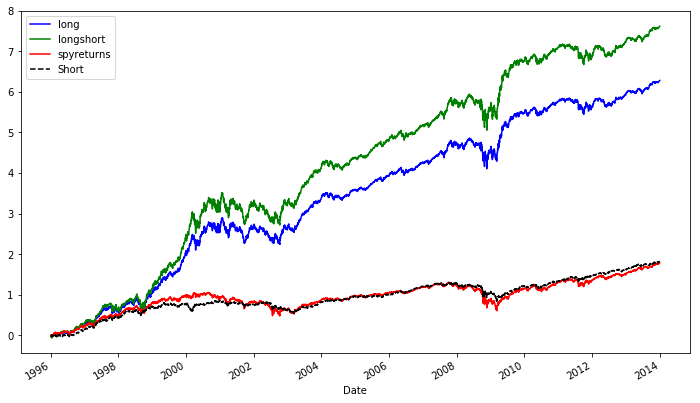

In [256]:
long= portfolio1['long'].cumsum()
long.plot(color='b')
longshort = portfolio1['longshort'].cumsum()
longshort.plot(color = 'g')
SP500 = (portfolio1['spyreturns']).cumsum()
SP500.plot(color='r')
short = portfolio1['short'].cumsum()
short.plot( style= 'k--', label = 'Short', figsize=(12,7))
plt.legend()
plt.show()

Checking if the strategy generates any alpha 

In [169]:
#Long 

reg_long = smf.ols('excess_long ~ marketprem', data=portfolio1).fit()
print(reg_long.summary())

                            OLS Regression Results                            
Dep. Variable:            excess_long   R-squared:                       0.748
Model:                            OLS   Adj. R-squared:                  0.748
Method:                 Least Squares   F-statistic:                 1.338e+04
Date:                Thu, 19 Dec 2019   Prob (F-statistic):               0.00
Time:                        20:46:22   Log-Likelihood:                 13774.
No. Observations:                4516   AIC:                        -2.754e+04
Df Residuals:                    4514   BIC:                        -2.753e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0008      0.000      4.861      0.0

The Alpha is small but significant. 

In [170]:
#Long/Short

reg_longshort = smf.ols('excess_longshort ~ marketprem', data=portfolio1).fit()
print(reg_longshort.summary())

                            OLS Regression Results                            
Dep. Variable:       excess_longshort   R-squared:                       0.696
Model:                            OLS   Adj. R-squared:                  0.695
Method:                 Least Squares   F-statistic:                 1.031e+04
Date:                Thu, 19 Dec 2019   Prob (F-statistic):               0.00
Time:                        20:46:27   Log-Likelihood:                 12430.
No. Observations:                4516   AIC:                        -2.486e+04
Df Residuals:                    4514   BIC:                        -2.484e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0010      0.000      4.529      0.0

The alpha is small but very significant. Strategy has a much higher beta 

In [171]:
#Short

reg_short = smf.ols('excess_short ~ marketprem', data=portfolio1).fit()
print(reg_short.summary())

                            OLS Regression Results                            
Dep. Variable:           excess_short   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.753
Method:                 Least Squares   F-statistic:                 1.377e+04
Date:                Thu, 19 Dec 2019   Prob (F-statistic):               0.00
Time:                        20:46:29   Log-Likelihood:                 18057.
No. Observations:                4516   AIC:                        -3.611e+04
Df Residuals:                    4514   BIC:                        -3.610e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0001   6.61e-05      1.893      0.0

Alpha is very small but significant. The beta is less than the market beta. 

    +Switching to Portfolio 2: Sorted based on volatility spread 

In [278]:
#long short 130/30
portfolio2['longshort'] = portfolio2['long']*1.3 + portfolio2['short']*-0.3
portfolio2['longshort2.0'] = portfolio2['long']*1.3 + portfolio2['short']*-0.5
portfolio2['rf'] = irx['irx returns']
#Excess
portfolio2['marketprem'] = portfolio2['spyreturns'] - portfolio2['rf']
portfolio2['excess_long'] = portfolio2['long'] - portfolio2['rf']
portfolio2['excess_longshort'] = portfolio2['longshort'] - portfolio2['rf']
portfolio2['excess_longshort_2'] = portfolio2['longshort2.0'] - portfolio2['rf']
portfolio2['excess_short'] = portfolio2['short'] - portfolio2['rf']

#Downside 
portfolio2['DSD_long'] = np.minimum(portfolio2['long'],0)**2  #Downside deviation of long only 
portfolio2['DSD_longshort'] = np.minimum(portfolio2['longshort'],0)**2 #Downside deviation of long/short
portfolio2['DSD_longshort2.0'] = np.minimum(portfolio2['longshort2.0'],0)**2
portfolio2['DSD_short'] = np.minimum(portfolio2['short'],0)**2

#Cumulative
portfolio2['cum_long'] = (1+portfolio2['long']).cumprod() #Cumulative returns long only 
portfolio2['cum_longshort'] = (1+portfolio2['longshort']).cumprod() #Cumulative returns long/short 
portfolio2['cum_longshort2.0'] = (1+portfolio2['longshort2.0']).cumprod()
portfolio2['cum_short'] = (1+portfolio2['short']).cumprod() #Cumulative returns short

#Max DrawDown
portfolio2['cummax_long'] = portfolio2['cum_long'].cummax()
portfolio2['cummax_longshort'] = portfolio2['cum_longshort'].cummax()
portfolio2['cummax_longshort2.0'] = portfolio2['cum_longshort2.0'].cummax()
portfolio2['cummax_short'] = portfolio2['cum_short'].cummax()
portfolio2['long_max'] = -(portfolio2['cum_long']/portfolio2['cummax_long']-1)
portfolio2['longshort_max'] = -(portfolio2['cum_longshort']/portfolio2['cummax_longshort']-1)
portfolio2['longshort_max2.0'] = -(portfolio2['cum_longshort2.0']/portfolio2['cummax_longshort2.0']-1)
portfolio2['short_max'] = -(portfolio2['cum_short']/portfolio2['cummax_short']-1)

In [279]:
portfolio2.describe()

,spyreturns,short,long,longshort,longshort2.0,rf,marketprem,excess_long,excess_longshort,excess_longshort_2,...,cum_longshort2.0,cum_short,cummax_long,cummax_longshort,cummax_longshort2.0,cummax_short,long_max,longshort_max,longshort_max2.0,short_max
count,4529.000000,4529.000000,4529.000000,4529.000000,4529.000000,4.516000e+03,4516.000000,4516.000000,4516.000000,4516.000000,...,4529.000000,4529.000000,4529.000000,4529.000000,4529.000000,4529.000000,4529.000000,4529.000000,4529.000000,4529.000000
mean,0.000395,-0.000234,0.002141,0.002853,0.002900,1.024233e-04,0.000292,0.002033,0.002748,0.002797,...,44256.531724,0.425605,1542.723337,30492.760323,44840.911256,1.000248,0.023513,0.018668,0.012577,0.574493
std,0.012915,0.015247,0.015179,0.015641,0.013093,8.402894e-05,0.012931,0.015192,0.015655,0.013103,...,78882.382765,0.295038,2370.392905,53870.779617,79729.797530,0.000175,0.034512,0.028538,0.020140,0.294986
min,-0.098448,-0.123336,-0.100641,-0.104401,-0.090928,1.190476e-07,-0.098455,-0.100659,-0.104405,-0.090932,...,1.009159,0.094809,1.006260,1.008751,1.009159,0.997958,-0.000000,-0.000000,-0.000000,-0.000000
25%,-0.005609,-0.006840,-0.004724,-0.004603,-0.003372,5.952381e-06,-0.005684,-0.004840,-0.004675,-0.003502,...,85.547497,0.194701,28.035795,80.859609,85.547497,1.000262,-0.000000,-0.000000,-0.000000,0.229389
50%,0.000746,0.000327,0.002246,0.002822,0.002708,8.480159e-05,0.000669,0.002101,0.002702,0.002604,...,3150.443683,0.270101,292.521335,2376.194293,3202.334583,1.000262,0.009692,0.006640,0.003896,0.729970
75%,0.006676,0.006872,0.008914,0.010040,0.008917,1.924603e-04,0.006551,0.008801,0.009896,0.008781,...,51571.124296,0.770813,2121.718780,34905.693003,52357.279086,1.000262,0.031468,0.025415,0.017066,0.805350
max,0.145198,0.149159,0.154519,0.156127,0.126295,2.468254e-04,0.145189,0.154511,0.156119,0.126287,...,338030.057937,1.000262,9584.136385,232243.845251,338030.057937,1.000262,0.259957,0.228514,0.171201,0.905216


In [280]:
#Sharpe Ratio 

sharpe_long2 = portfolio2['excess_long'].mean() / portfolio2['long'].std() * np.sqrt(250)
sharpe_longshort2 = portfolio2['excess_longshort'].mean() / portfolio2['longshort'].std() * np.sqrt(250)
sharpe_longshort_2 = portfolio2['excess_longshort_2'].mean() / portfolio2['longshort2.0'].std() * np.sqrt(250)
sharpe_short2 = portfolio2['excess_short'].mean() / portfolio2['short'].std() * np.sqrt(250)

#Sortino 

sortino_long2 = portfolio2['excess_long'].mean() / np.sqrt(portfolio2['DSD_long'].mean()) * np.sqrt(250)
sortino_longshort2 = portfolio2['excess_longshort'].mean() / np.sqrt(portfolio2['DSD_longshort'].mean()) * np.sqrt(250)
sortino_longshort_2 = portfolio2['excess_longshort_2'].mean() / np.sqrt(portfolio2['DSD_longshort2.0'].mean()) * np.sqrt(250)
sortino_short2 = portfolio2['excess_short'].mean() / np.sqrt(portfolio2['DSD_short'].mean()) * np.sqrt(250)


#Max Drawdown 

long_max2 = portfolio2['long_max'].max()
longshort_max2 = portfolio2['longshort_max'].max()
longshort_max_2 = portfolio2['longshort_max2.0'].max()
short_max2= portfolio2['short_max'].max()

#Creating dataframe 

dictionary2= {'Sharpe Ratio':[sharpe_long2, sharpe_longshort2, sharpe_longshort_2, sharpe_short2 ], 
               'Sortino':[sortino_long2, sortino_longshort2, sortino_longshort_2, sortino_short2],
              'MaxDrawdown':[long_max2, longshort_max2,longshort_max_2, short_max2]}
performance2 = pd.DataFrame(dictionary2, index =['Long', 'Long/Short 130/30', 'Long/Short 150/50', 'Short'])
performance2.head()


,Sharpe Ratio,Sortino,MaxDrawdown
Long,2.117758,3.372900,0.259957
Long/Short 130/30,2.777611,4.628994,0.228514
Long/Short 150/50,3.377933,5.896733,0.171201
Short,-0.362239,-0.498841,0.905216


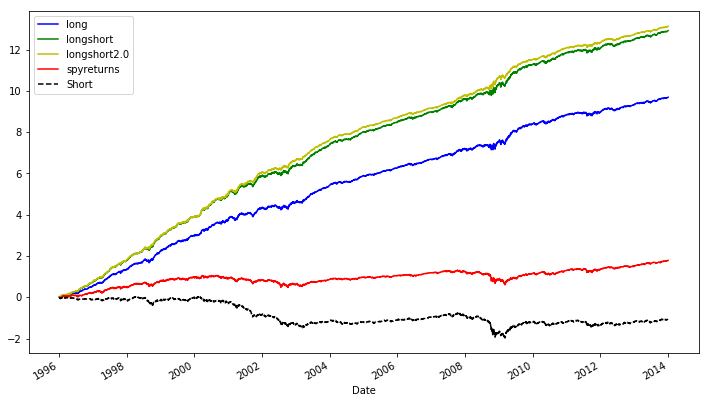

In [281]:
#Graphical Analysis
long2= portfolio2['long'].cumsum()
long2.plot(color='b')
longshort2 = portfolio2['longshort'].cumsum()
longshort2.plot(color = 'g')
longshort_2 = portfolio2['longshort2.0'].cumsum()
longshort_2.plot(color = 'y')
SP500 = (portfolio2['spyreturns']).cumsum()
SP500.plot(color='r')
short2 = (portfolio2['short']).cumsum()
short2.plot(style= 'k--', label = 'Short', figsize=(12,7))
plt.legend()
plt.show()

    +Checking for alpha 

In [282]:
#long

reg_long2 = smf.ols('excess_long ~ marketprem', data=portfolio2).fit()
print(reg_long2.summary())

                            OLS Regression Results                            
Dep. Variable:            excess_long   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                 2.393e+04
Date:                Fri, 20 Dec 2019   Prob (F-statistic):               0.00
Time:                        02:04:15   Log-Likelihood:                 16658.
No. Observations:                4516   AIC:                        -3.331e+04
Df Residuals:                    4514   BIC:                        -3.330e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0017   9.01e-05     19.076      0.0

Significant alpha and beta is almost 1

In [283]:
#Long/Short 

reg_longshort2 = smf.ols('excess_longshort ~ marketprem', data=portfolio2).fit()
print(reg_longshort2.summary())

                            OLS Regression Results                            
Dep. Variable:       excess_longshort   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.796
Method:                 Least Squares   F-statistic:                 1.764e+04
Date:                Fri, 20 Dec 2019   Prob (F-statistic):               0.00
Time:                        02:04:16   Log-Likelihood:                 15958.
No. Observations:                4516   AIC:                        -3.191e+04
Df Residuals:                    4514   BIC:                        -3.190e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0024      0.000     23.123      0.0

In [284]:
#Long/Short 2.0

reg_longshort_2 = smf.ols('excess_longshort_2 ~ marketprem', data=portfolio2).fit()
print(reg_longshort_2.summary())

                            OLS Regression Results                            
Dep. Variable:     excess_longshort_2   R-squared:                       0.731
Model:                            OLS   Adj. R-squared:                  0.731
Method:                 Least Squares   F-statistic:                 1.229e+04
Date:                Fri, 20 Dec 2019   Prob (F-statistic):               0.00
Time:                        02:04:30   Log-Likelihood:                 16137.
No. Observations:                4516   AIC:                        -3.227e+04
Df Residuals:                    4514   BIC:                        -3.226e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0025      0.000     25.164      0.0

Same as before, results are strong. 

In [285]:
#Short

reg_short2 = smf.ols('excess_short ~ marketprem', data=portfolio2).fit()
print(reg_short2.summary())

                            OLS Regression Results                            
Dep. Variable:           excess_short   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                 2.064e+04
Date:                Fri, 20 Dec 2019   Prob (F-statistic):               0.00
Time:                        02:04:34   Log-Likelihood:                 16360.
No. Observations:                4516   AIC:                        -3.272e+04
Df Residuals:                    4514   BIC:                        -3.270e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0007   9.62e-05     -6.873      0.0

Negative alpha, this portfolio is no good. 

    +Graphical comparison of the two strategies long/short 

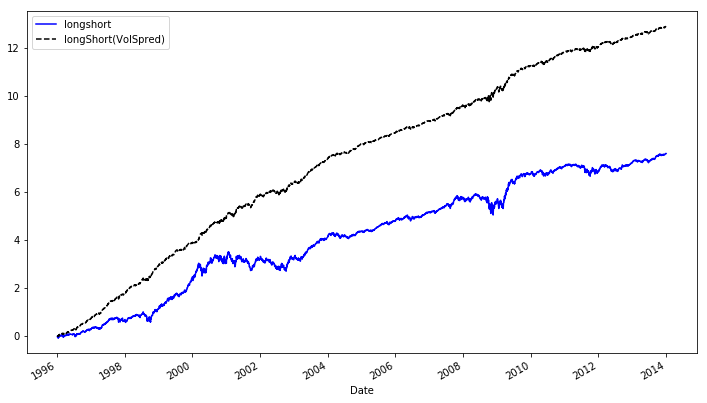

In [179]:
#Graphical Analysis
longshort.plot(color='b')
longshort2.plot(style= 'k--', label = 'longShort(VolSpred)', figsize=(12,7))
plt.legend()
plt.show()

The long-short portfolio created using Volatility spread outperforms the long-short portfolio created using volatility Risk Premium. Needless to say they outperformed the market.  

    +Alternative strategies (minimize risk during bad times) 
    -Long(Strategy1)

In [180]:
portfolio3 = portfolio1[['long', 'longshort', 'short']]
portfolio3['long2'] = portfolio2['long']
portfolio3['longshort2'] = portfolio2['longshort']
portfolio3['short2'] = portfolio2['short']
portfolio3.head()

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

,long,longshort,short,long2,longshort2,short2
Date,,,,,,
1996-01-05,-0.003202,-0.006510,0.007827,0.006260,0.008751,-0.002042
1996-01-08,-0.000406,-0.001649,0.003738,0.005148,0.007518,-0.002753
1996-01-09,-0.038805,-0.047760,-0.008955,-0.013393,-0.009302,-0.027028
1996-01-10,0.002237,0.008239,-0.017770,-0.006794,-0.004440,-0.014643
1996-01-11,0.015705,0.019508,0.003027,0.010398,0.013590,-0.000242


    +Port1: Combination of the two long-shorts 
    +Port2: Combination of long and short2 
    +Port3: Combination of long2 and short 

In [181]:
portfolio3['port1'] = portfolio3['longshort']*0.5 + portfolio3['longshort2']*0.5
portfolio3['port2'] = portfolio3['long']*1.3 + portfolio3['short2']*-0.3
portfolio3['port3'] = portfolio3['long2']*1.3 + portfolio3['short']*-0.3

#Cumulative
portfolio3['cum_port1'] = (1+portfolio3['port1']).cumprod() #Cumulative returns long only 
portfolio3['cum_port2'] = (1+portfolio3['port2']).cumprod() #Cumulative returns long/short 
portfolio3['cum_port3'] = (1+portfolio3['port3']).cumprod() #Cumulative returns short

#Max DrawDown
portfolio3['cummax_port1'] = portfolio3['cum_port1'].cummax()
portfolio3['cummax_port2'] = portfolio3['cum_port2'].cummax()
portfolio3['cummax_port3'] = portfolio3['cum_port3'].cummax()
portfolio3['port1_max'] = -(portfolio3['cum_port1']/portfolio3['cummax_port1']-1)
portfolio3['port2_max'] = -(portfolio3['cum_port2']/portfolio3['cummax_port2']-1)
portfolio3['port3_max'] = -(portfolio3['cum_port3']/portfolio3['cummax_port3']-1)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/p

In [182]:
#Max Drawdown 

port1_max = portfolio3['port1_max'].max()
port2_max = portfolio3['port2_max'].max()
port3_max= portfolio3['port3_max'].max()

#Creating dataframe 

dictionary3= {'MaxDrawdown':[port1_max, port2_max, port3_max]}

performance3 = pd.DataFrame(dictionary3, index =['port1', 'port2', 'port3'])
performance3.head()

,MaxDrawdown
port1,0.430093
port2,0.574961
port3,0.280712


    +Port1: Combination of the two long-shorts 
    +Port2: Combination of long and short2 
    +Port3: Combination of long2 and short 

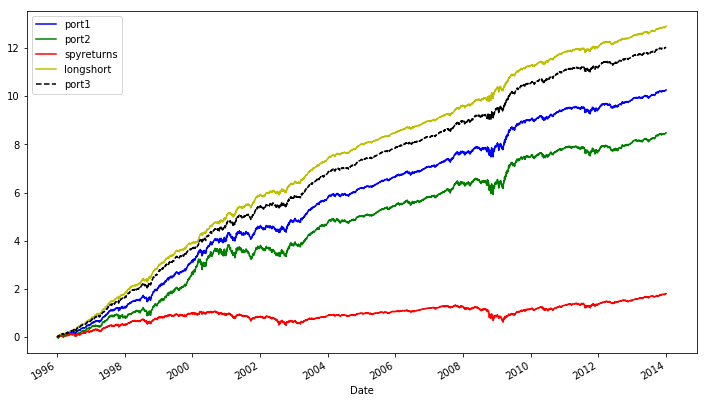

In [183]:
#Graphical Analysis
port_1= portfolio3['port1'].cumsum()
port_1.plot(color='b')
port_2 = portfolio3['port2'].cumsum()
port_2.plot(color = 'g')
SP500 = portfolio2['spyreturns'].cumsum()
SP500.plot(color='r')
longshort2.plot(color = 'y')
port_3 = (portfolio3['port3']).cumsum()
port_3.plot(style= 'k--', label = 'port3', figsize=(12,7))
plt.legend()
plt.show()

In [184]:
portfolio3.describe()

,long,longshort,short,long2,longshort2,short2,port1,port2,port3,cum_port1,cum_port2,cum_port3,cummax_port1,cummax_port2,cummax_port3,port1_max,port2_max,port3_max
count,4529.000000,4529.000000,4529.000000,4529.000000,4529.000000,4529.000000,4529.000000,4529.000000,4529.000000,4529.000000,4529.000000,4529.000000,4529.000000,4529.000000,4529.000000,4529.000000,4529.000000,4529.000000
mean,0.001387,0.001682,0.000403,0.002141,0.002853,-0.000234,0.002268,0.001873,0.002662,1661.041419,218.067418,11600.210259,1743.083409,239.155782,11926.253466,0.047029,0.097536,0.026127
std,0.022798,0.027946,0.008924,0.015179,0.015641,0.015247,0.021161,0.025510,0.017664,2503.440179,277.730970,19650.093510,2598.546147,297.587094,20086.181491,0.062621,0.118133,0.038195
min,-0.147215,-0.171566,-0.066628,-0.100641,-0.104401,-0.123336,-0.133752,-0.154379,-0.117453,0.975411,0.951727,0.993012,1.001120,0.996450,1.005790,-0.000000,-0.000000,-0.000000
25%,-0.008907,-0.010754,-0.003940,-0.004724,-0.004603,-0.006840,-0.007135,-0.009605,-0.005409,37.057443,16.574607,60.733643,37.397091,21.915234,60.733643,0.001194,0.008939,-0.000000
50%,0.001786,0.002090,0.000601,0.002246,0.002822,0.000327,0.002143,0.002192,0.002575,300.220584,70.508694,1151.736287,308.224558,72.275598,1178.791947,0.021125,0.047511,0.010395
75%,0.011308,0.013725,0.004986,0.008914,0.010040,0.006872,0.011434,0.012881,0.010570,2549.327641,387.381173,14573.254235,2655.937900,407.245069,15061.936215,0.067430,0.143762,0.035718
max,0.195180,0.258599,0.113074,0.154519,0.156127,0.149159,0.189666,0.238941,0.166952,10450.168516,1115.097252,84208.572982,10450.168516,1115.097252,84208.572982,0.430093,0.574961,0.280712


The long/short portfolio created earlier is still the best out of all with the lowest downside risk and the highest return 

    +Now we will repeat the same strategies to test the out of sample performance

In [185]:


#Lagging all the variables by 1 day 

test['realizedvar'] = test['realizedvar'].groupby('secid').shift()
test['impliedvol'] = test['impliedvol'].groupby('secid').shift()
test['varianceRP'] = test['varianceRP'].groupby('secid').shift()
test['volRP'] = test['volRP'].groupby('secid').shift()
test['volspread'] = test['volspread'].groupby('secid').shift()
test.head()

,,return,market_cap,realizedvar,impliedvol,varianceRP,volRP,volspread,QUINTILE1,QUINTILE2
date,secid,,,,,,,,,
2014-01-03,100892.0,0.002881,30831853.5,NaN,NaN,NaN,NaN,NaN,1,1
2014-01-06,100892.0,-0.019199,30239919.2,0.000075,0.176308,0.176233,0.411221,-0.009652,1,1
2014-01-07,100892.0,0.003237,30337798.1,0.000023,0.175445,0.175422,0.414021,-0.011536,1,1
2014-01-08,100892.0,-0.007067,30123396.7,0.000380,0.180789,0.180409,0.405701,-0.004005,1,1
2014-01-09,100892.0,-0.005570,29955604.3,0.000044,0.174996,0.174952,0.411726,-0.012499,1,1


In [186]:
test = test.sort_values(by = ['secid', 'date'], ascending =[True, True])
test.head()

,,return,market_cap,realizedvar,impliedvol,varianceRP,volRP,volspread,QUINTILE1,QUINTILE2
date,secid,,,,,,,,,
2014-01-03,100892.0,0.002881,30831853.5,NaN,NaN,NaN,NaN,NaN,1,1
2014-01-06,100892.0,-0.019199,30239919.2,0.000075,0.176308,0.176233,0.411221,-0.009652,1,1
2014-01-07,100892.0,0.003237,30337798.1,0.000023,0.175445,0.175422,0.414021,-0.011536,1,1
2014-01-08,100892.0,-0.007067,30123396.7,0.000380,0.180789,0.180409,0.405701,-0.004005,1,1
2014-01-09,100892.0,-0.005570,29955604.3,0.000044,0.174996,0.174952,0.411726,-0.012499,1,1


In [187]:
test = test.dropna()

Test Strategy 1: Split Based on VolRP

In [188]:
test['QUINTILE1'] = test['volRP'].groupby('date').apply(quintiles)

In [189]:
test_strategy1 = test.groupby(['QUINTILE1','date'])['return'].mean()
test1 = test_strategy1.groupby(['QUINTILE1']).describe()
test1

,count,mean,std,min,25%,50%,75%,max
QUINTILE1,,,,,,,,
1,1005.0,0.000479,0.005830,-0.036015,-0.002073,0.000524,0.003537,0.028842
2,1005.0,0.000416,0.007069,-0.037180,-0.002792,0.000518,0.003914,0.030929
3,1005.0,0.000501,0.008196,-0.047550,-0.002992,0.000698,0.004727,0.030371
4,1005.0,0.000523,0.009074,-0.055527,-0.003839,0.000656,0.005146,0.033639
5,1005.0,0.000869,0.011783,-0.075640,-0.005064,0.001270,0.007134,0.051252


In [190]:
test.groupby('QUINTILE1')['volRP'].describe()

,count,mean,std,min,25%,50%,75%,max
QUINTILE1,,,,,,,,
1,81412.0,0.370157,0.047611,-0.251688,0.350738,0.374025,0.397678,0.526201
2,80815.0,0.422548,0.031807,0.351863,0.399428,0.419195,0.440304,0.558910
3,80815.0,0.459626,0.033095,0.384827,0.435431,0.456517,0.478768,0.610744
4,80815.0,0.507710,0.036585,0.421285,0.481425,0.504826,0.530074,0.674722
5,81211.0,0.627870,0.104254,0.481879,0.561857,0.602775,0.663133,1.664349


Test Strategy2: Split based on Vol Spread 

In [191]:
test['QUINTILE2'] = test['volspread'].groupby('date').apply(quintiles)

In [192]:
test_strategy2 = test.groupby(['QUINTILE2','date'])['return'].mean()

In [193]:
test2 = test_strategy2.groupby(['QUINTILE2']).describe()
test2

,count,mean,std,min,25%,50%,75%,max
QUINTILE2,,,,,,,,
1,1005.0,0.000566,0.008830,-0.052260,-0.003861,0.000436,0.005403,0.032473
2,1005.0,0.000527,0.007755,-0.037496,-0.002985,0.000481,0.004606,0.030242
3,1005.0,0.000484,0.007757,-0.038142,-0.003033,0.000674,0.004427,0.031633
4,1005.0,0.000578,0.007975,-0.044479,-0.002895,0.000661,0.004546,0.032862
5,1005.0,0.000633,0.008752,-0.063966,-0.003347,0.000993,0.005009,0.031874


In [194]:
test.groupby('QUINTILE2')['volspread'].describe()

,count,mean,std,min,25%,50%,75%,max
QUINTILE2,,,,,,,,
1,81413.0,-0.062599,0.148499,-2.619372,-0.055599,-0.027730,-0.015619,0.027268
2,80815.0,-0.007076,0.007529,-0.064364,-0.010640,-0.006613,-0.002980,0.044685
3,80818.0,-0.000569,0.006507,-0.041974,-0.004038,-0.000922,0.002312,0.062768
4,80811.0,0.004947,0.007206,-0.029295,0.000889,0.003960,0.007581,0.091876
5,81211.0,0.048406,0.116530,-0.016208,0.009801,0.017565,0.038280,2.594968


Creating strategy data frames

In [195]:
test_strategy1 = pd.DataFrame(test_strategy1)
test_strategy1 = test_strategy1.reorder_levels(['date','QUINTILE1']).unstack()
test_strategy1.head()

return                                        
QUINTILE1          1         2         3         4         5
date                                                        
2014-01-06 -0.003509 -0.003664 -0.004278 -0.005740 -0.002558
2014-01-07  0.003963  0.002940  0.006398  0.009065  0.009629
2014-01-08 -0.004225 -0.000646  0.000359  0.002646  0.005813
2014-01-09  0.001270  0.001578  0.000315  0.001425 -0.005856
2014-01-10  0.003791  0.004732  0.004622  0.006122  0.013494

In [196]:
test_strategy2 = pd.DataFrame(test_strategy2)
test_strategy2 = test_strategy2.reorder_levels(['date','QUINTILE2']).unstack()
test_strategy2.head()

return                                        
QUINTILE2          1         2         3         4         5
date                                                        
2014-01-06 -0.001752 -0.003098 -0.003292 -0.005455 -0.006139
2014-01-07  0.007390  0.003561  0.005998  0.005993  0.009053
2014-01-08  0.000374  0.002656 -0.000979  0.003377 -0.001482
2014-01-09 -0.002202  0.002326  0.001471 -0.000150 -0.002713
2014-01-10  0.007953  0.005736  0.003301  0.005915  0.009857

Loading SPY and IRX again 

In [197]:
spy1     = pd.read_csv('SPY.csv', parse_dates=[0], index_col=[0])
irx1     = pd.read_csv('^IRX.csv', parse_dates=[0], index_col=[0])

In [198]:
spy1['spyreturns']  = spy1['Adj Close'].pct_change()
irx1['irx returns'] = irx1['Close']/252/100
spy1= spy1.dropna()
irx1 = irx1.dropna()
spy1 = spy1.loc['2014-01-03':'2017-12-29']

irx1 = irx1.loc['2014-01-03':'2017-12-29']

In [199]:
spy1.drop(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], axis = 1, inplace=True)

irx1.drop(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], axis = 1, inplace=True)
irx1.head()

,irx returns
Date,
2014-01-03,0.000002
2014-01-06,0.000002
2014-01-07,0.000002
2014-01-08,0.000002
2014-01-09,0.000001


Merging SPY and IRX with strategy files

In [287]:
portfolio4 = pd.merge(test_strategy1, spy1, right_index= True, left_index=True)
portfolio4['short'] = portfolio4.iloc[:,[0]] 
portfolio4['long'] = portfolio4.iloc[:,[4]] 

portfolio4.drop(portfolio4.iloc[:,[0,1,2,3,4]], axis = 1, inplace=True)
portfolio4.head()

,spyreturns,short,long
2014-01-06,-0.002898,-0.003509,-0.002558
2014-01-07,0.006142,0.003963,0.009629
2014-01-08,0.000218,-0.004225,0.005813
2014-01-09,0.000654,0.001270,-0.005856
2014-01-10,0.002723,0.003791,0.013494


In [288]:
portfolio5 = pd.merge(test_strategy2, spy1, right_index= True, left_index=True)
portfolio5['short'] = portfolio5.iloc[:,[0]] 
portfolio5['long'] = portfolio5.iloc[:,[4]] 

portfolio5.drop(portfolio5.iloc[:,[0,1,2,3,4]], axis = 1, inplace=True)
portfolio5.head()


,spyreturns,short,long
2014-01-06,-0.002898,-0.001752,-0.006139
2014-01-07,0.006142,0.007390,0.009053
2014-01-08,0.000218,0.000374,-0.001482
2014-01-09,0.000654,-0.002202,-0.002713
2014-01-10,0.002723,0.007953,0.009857


Test Strategy 1 analysis

In [289]:

#long short 130/30
portfolio4['longshort'] = portfolio4['long']*1.3 + portfolio4['short']*-0.3 
portfolio4['rf'] = irx1['irx returns']
#Excess
portfolio4['marketprem'] = portfolio4['spyreturns'] - portfolio4['rf']
portfolio4['excess_long'] = portfolio4['long'] - portfolio4['rf']
portfolio4['excess_longshort'] = portfolio4['longshort'] - portfolio4['rf']
portfolio4['excess_short'] = portfolio4['short'] - portfolio4['rf']

#Downside 
portfolio4['DSD_long'] = np.minimum(portfolio4['long'],0)**2  #Downside deviation of long only 
portfolio4['DSD_longshort'] = np.minimum(portfolio4['longshort'],0)**2 #Downside deviation of long/short
portfolio4['DSD_short'] = np.minimum(portfolio4['short'],0)**2

#Cumulative
portfolio4['cum_long'] = (1+portfolio4['long']).cumprod() #Cumulative returns long only 
portfolio4['cum_longshort'] = (1+portfolio4['longshort']).cumprod() #Cumulative returns long/short 
portfolio4['cum_short'] = (1+portfolio4['short']).cumprod() #Cumulative returns short

#Max DrawDown
portfolio4['cummax_long'] = portfolio4['cum_long'].cummax()
portfolio4['cummax_longshort'] = portfolio4['cum_longshort'].cummax()
portfolio4['cummax_short'] = portfolio4['cum_short'].cummax()
portfolio4['long_max'] = -(portfolio4['cum_long']/portfolio4['cummax_long']-1)
portfolio4['longshort_max'] = -(portfolio4['cum_longshort']/portfolio4['cummax_longshort']-1)
portfolio4['short_max'] = -(portfolio4['cum_short']/portfolio4['cummax_short']-1)

In [290]:
portfolio4.describe()

,spyreturns,short,long,longshort,rf,marketprem,excess_long,excess_longshort,excess_short,DSD_long,...,DSD_short,cum_long,cum_longshort,cum_short,cummax_long,cummax_longshort,cummax_short,long_max,longshort_max,short_max
count,1005.000000,1005.000000,1005.000000,1005.000000,1.004000e+03,1004.000000,1004.000000,1004.000000,1004.000000,1005.000000,...,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000
mean,0.000485,0.000479,0.000869,0.000987,1.276300e-05,0.000475,0.000866,0.000986,0.000467,0.000067,...,0.000016,1.400851,1.439693,1.256456,1.458439,1.520221,1.270373,0.042552,0.057511,0.011225
std,0.007586,0.005830,0.011783,0.014057,1.532832e-05,0.007589,0.011784,0.014059,0.005832,0.000259,...,0.000063,0.337664,0.395762,0.157942,0.313593,0.362191,0.155059,0.055396,0.070446,0.014769
min,-0.042107,-0.036015,-0.075640,-0.092135,1.190476e-07,-0.042107,-0.075650,-0.092145,-0.036016,0.000000,...,0.000000,0.965383,0.930531,0.954783,0.997442,0.997727,0.996491,-0.000000,-0.000000,-0.000000
25%,-0.002679,-0.002073,-0.005064,-0.006242,7.142857e-07,-0.002719,-0.004939,-0.006237,-0.002121,0.000000,...,0.000000,1.158509,1.162236,1.146509,1.220297,1.254428,1.177660,0.003538,0.005919,0.001018
50%,0.000505,0.000524,0.001270,0.001326,7.797619e-06,0.000492,0.001250,0.001325,0.000505,0.000000,...,0.000000,1.255718,1.256687,1.207893,1.357855,1.406492,1.229147,0.019236,0.027008,0.005269
75%,0.004484,0.003537,0.007134,0.008659,1.958333e-05,0.004475,0.007098,0.008644,0.003532,0.000026,...,0.000004,1.595893,1.658606,1.358008,1.600604,1.665529,1.361972,0.058971,0.084538,0.015384
max,0.038394,0.028842,0.051252,0.061719,5.587302e-05,0.038392,0.051250,0.061717,0.028839,0.005721,...,0.001297,2.237145,2.443123,1.592943,2.237145,2.443123,1.592943,0.274413,0.338403,0.087080


In [291]:
#Sharpe Ratio 

sharpe_long4 = portfolio4['excess_long'].mean() / portfolio4['long'].std() * np.sqrt(250)
sharpe_longshort4 = portfolio4['excess_longshort'].mean() / portfolio4['longshort'].std() * np.sqrt(250)
sharpe_short4 = portfolio4['excess_short'].mean() / portfolio4['short'].std() * np.sqrt(250)

#Sortino 

sortino_long4 = portfolio4['excess_long'].mean() / np.sqrt(portfolio4['DSD_long'].mean()) * np.sqrt(250)
sortino_longshort4 = portfolio4['excess_longshort'].mean() / np.sqrt(portfolio4['DSD_longshort'].mean()) * np.sqrt(250)
sortino_short4 = portfolio4['excess_short'].mean() / np.sqrt(portfolio4['DSD_short'].mean()) * np.sqrt(250)


#Max Drawdown 

long_max4 = portfolio4['long_max'].max()
longshort_max4 = portfolio4['longshort_max'].max()
short_max4= portfolio4['short_max'].max()

#Creating dataframe 

dictionary4= {'Sharpe Ratio':[sharpe_long4, sharpe_longshort4, sharpe_short4 ], 
               'Sortino':[sortino_long4, sortino_longshort4, sortino_short4],
              'MaxDrawdown':[long_max4, longshort_max4, short_max4]}
performance4 = pd.DataFrame(dictionary4, index =['Long', 'Long/Short', 'Short'])
performance4.head()

,Sharpe Ratio,Sortino,MaxDrawdown
Long,1.162389,1.668507,0.274413
Long/Short,1.109069,1.590304,0.338403
Short,1.266022,1.825646,0.087080


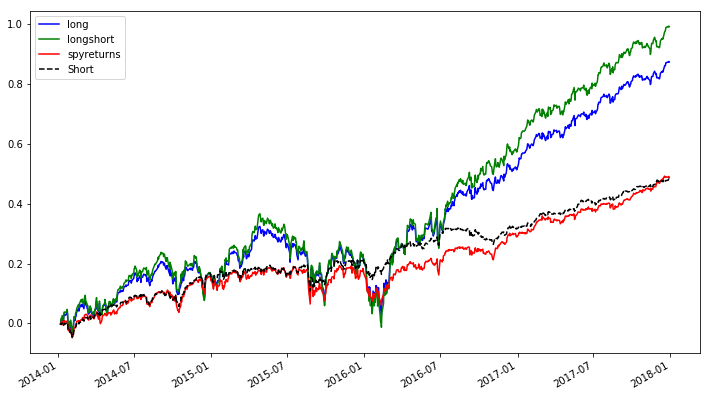

In [292]:
#Graphical Analysis
long4= portfolio4['long'].cumsum()
long4.plot(color='b')
longshort4 = portfolio4['longshort'].cumsum()
longshort4.plot(color = 'g')
SP500_4 = (portfolio4['spyreturns']).cumsum()
SP500_4.plot(color='r')
short4 = (portfolio4['short']).cumsum()
short4.plot(style= 'k--', label = 'Short', figsize=(12,7))
plt.legend()
plt.show()

Testing for alpha 

In [293]:
#long

reg_long4 = smf.ols('excess_long ~ marketprem', data=portfolio4).fit()
print(reg_long4.summary())

                            OLS Regression Results                            
Dep. Variable:            excess_long   R-squared:                       0.730
Model:                            OLS   Adj. R-squared:                  0.730
Method:                 Least Squares   F-statistic:                     2711.
Date:                Fri, 20 Dec 2019   Prob (F-statistic):          2.98e-287
Time:                        02:17:41   Log-Likelihood:                 3692.2
No. Observations:                1004   AIC:                            -7380.
Df Residuals:                    1002   BIC:                            -7371.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0002      0.000      1.220      0.2

In [294]:
#longshort

reg_longshort4 = smf.ols('excess_longshort ~ marketprem', data=portfolio4).fit()
print(reg_longshort4.summary())

                            OLS Regression Results                            
Dep. Variable:       excess_longshort   R-squared:                       0.664
Model:                            OLS   Adj. R-squared:                  0.664
Method:                 Least Squares   F-statistic:                     1979.
Date:                Fri, 20 Dec 2019   Prob (F-statistic):          1.84e-239
Time:                        02:17:43   Log-Likelihood:                 3404.8
No. Observations:                1004   AIC:                            -6806.
Df Residuals:                    1002   BIC:                            -6796.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0003      0.000      1.045      0.2

In [295]:
#short

reg_short4 = smf.ols('excess_short ~ marketprem', data=portfolio4).fit()
print(reg_short4.summary())

                            OLS Regression Results                            
Dep. Variable:           excess_short   R-squared:                       0.874
Model:                            OLS   Adj. R-squared:                  0.873
Method:                 Least Squares   F-statistic:                     6920.
Date:                Fri, 20 Dec 2019   Prob (F-statistic):               0.00
Time:                        02:17:44   Log-Likelihood:                 4778.8
No. Observations:                1004   AIC:                            -9554.
Df Residuals:                    1002   BIC:                            -9544.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0001   6.56e-05      1.917      0.0

None of the startegies have a significant alpha out of sample 

Test Strategy 2 Analysis

In [296]:

#long short 130/30
portfolio5['longshort'] = portfolio5['long']*1.3 + portfolio5['short']*-0.3 
portfolio5['rf'] = irx1['irx returns']
#Excess
portfolio5['marketprem'] = portfolio5['spyreturns'] - portfolio5['rf']
portfolio5['excess_long'] = portfolio5['long'] - portfolio5['rf']
portfolio5['excess_longshort'] = portfolio5['longshort'] - portfolio5['rf']
portfolio5['excess_short'] = portfolio5['short'] - portfolio5['rf']

#Downside 
portfolio5['DSD_long'] = np.minimum(portfolio5['long'],0)**2  #Downside deviation of long only 
portfolio5['DSD_longshort'] = np.minimum(portfolio5['longshort'],0)**2 #Downside deviation of long/short
portfolio5['DSD_short'] = np.minimum(portfolio5['short'],0)**2

#Cumulative
portfolio5['cum_long'] = (1+portfolio5['long']).cumprod() #Cumulative returns long only 
portfolio5['cum_longshort'] = (1+portfolio5['longshort']).cumprod() #Cumulative returns long/short 
portfolio5['cum_short'] = (1+portfolio5['short']).cumprod() #Cumulative returns short

#Max DrawDown
portfolio5['cummax_long'] = portfolio5['cum_long'].cummax()
portfolio5['cummax_longshort'] = portfolio5['cum_longshort'].cummax()
portfolio5['cummax_short'] = portfolio5['cum_short'].cummax()
portfolio5['long_max'] = -(portfolio5['cum_long']/portfolio5['cummax_long']-1)
portfolio5['longshort_max'] = -(portfolio5['cum_longshort']/portfolio5['cummax_longshort']-1)
portfolio5['short_max'] = -(portfolio5['cum_short']/portfolio5['cummax_short']-1)

In [297]:
portfolio5.describe()

,spyreturns,short,long,longshort,rf,marketprem,excess_long,excess_longshort,excess_short,DSD_long,...,DSD_short,cum_long,cum_longshort,cum_short,cummax_long,cummax_longshort,cummax_short,long_max,longshort_max,short_max
count,1005.000000,1005.000000,1005.000000,1005.000000,1.004000e+03,1004.000000,1004.000000,1004.000000,1004.000000,1005.000000,...,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000
mean,0.000485,0.000566,0.000633,0.000653,1.276300e-05,0.000475,0.000634,0.000655,0.000562,0.000039,...,0.000038,1.296108,1.313605,1.235514,1.323698,1.341846,1.273552,0.021900,0.021995,0.031366
std,0.007586,0.008830,0.008752,0.008949,1.532832e-05,0.007589,0.008745,0.008939,0.008830,0.000171,...,0.000147,0.206215,0.211715,0.188574,0.195057,0.201704,0.170009,0.030259,0.030098,0.040196
min,-0.042107,-0.052260,-0.063966,-0.067477,1.190476e-07,-0.042107,-0.063975,-0.067487,-0.052270,0.000000,...,0.000000,0.948032,0.944620,0.959371,0.993861,0.992544,0.998248,-0.000000,-0.000000,-0.000000
25%,-0.002679,-0.003861,-0.003347,-0.003329,7.142857e-07,-0.002719,-0.003348,-0.003339,-0.003834,0.000000,...,0.000000,1.145561,1.155083,1.110886,1.188891,1.199443,1.162300,0.001739,0.001710,0.002803
50%,0.000505,0.000436,0.000993,0.000939,7.797619e-06,0.000492,0.000985,0.000942,0.000446,0.000000,...,0.000000,1.236458,1.260956,1.155496,1.264489,1.291770,1.215722,0.009868,0.009747,0.015405
75%,0.004484,0.005403,0.005009,0.005295,1.958333e-05,0.004475,0.004995,0.005294,0.005403,0.000011,...,0.000015,1.414689,1.434181,1.342702,1.414689,1.434181,1.343981,0.030524,0.030805,0.043754
max,0.038394,0.032473,0.031874,0.031694,5.587302e-05,0.038392,0.031872,0.031692,0.032471,0.004092,...,0.002731,1.817967,1.850947,1.701057,1.817967,1.850947,1.701057,0.157672,0.153428,0.200407


In [298]:
#Sharpe Ratio 

sharpe_long5 = portfolio5['excess_long'].mean() / portfolio5['long'].std() * np.sqrt(250)
sharpe_longshort5 = portfolio5['excess_longshort'].mean() / portfolio5['longshort'].std() * np.sqrt(250)
sharpe_short5 = portfolio5['excess_short'].mean() / portfolio5['short'].std() * np.sqrt(250)

#Sortino 

sortino_long5 = portfolio5['excess_long'].mean() / np.sqrt(portfolio5['DSD_long'].mean()) * np.sqrt(250)
sortino_longshort5 = portfolio5['excess_longshort'].mean() / np.sqrt(portfolio5['DSD_longshort'].mean()) * np.sqrt(250)
sortino_short5 = portfolio5['excess_short'].mean() / np.sqrt(portfolio5['DSD_short'].mean()) * np.sqrt(250)


#Max Drawdown 

long_max5 = portfolio5['long_max'].max()
longshort_max5 = portfolio5['longshort_max'].max()
short_max5= portfolio5['short_max'].max()

#Creating dataframe 

dictionary5= {'Sharpe Ratio':[sharpe_long5, sharpe_longshort5, sharpe_short5 ], 
               'Sortino':[sortino_long5, sortino_longshort5, sortino_short5],
              'MaxDrawdown':[long_max5, longshort_max5, short_max5]}
performance5 = pd.DataFrame(dictionary5, index =['Long', 'Long/Short', 'Short'])
performance5.head()

,Sharpe Ratio,Sortino,MaxDrawdown
Long,1.145102,1.612579,0.157672
Long/Short,1.158127,1.629110,0.153428
Short,1.005727,1.436836,0.200407


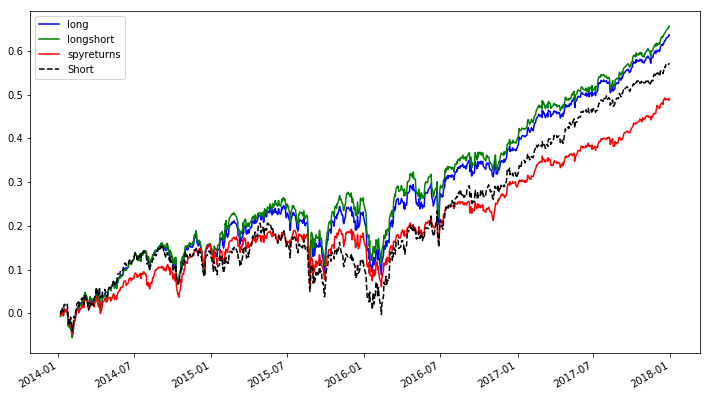

In [299]:
#Graphical Analysis
long5= portfolio5['long'].cumsum()
long5.plot(color='b')
longshort5 = portfolio5['longshort'].cumsum()
longshort5.plot(color = 'g')
SP500_5 = (portfolio5['spyreturns']).cumsum()
SP500_5.plot(color='r')
short5 = (portfolio5['short']).cumsum()
short5.plot(style= 'k--', label = 'Short', figsize=(12,7))
plt.legend()
plt.show()

The long-short portfolio is still extremely impressive beating the market with a smaller drawdown 

In [300]:
#long

reg_long5 = smf.ols('excess_long ~ marketprem', data=portfolio5).fit()
print(reg_long5.summary())

                            OLS Regression Results                            
Dep. Variable:            excess_long   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     5503.
Date:                Fri, 20 Dec 2019   Prob (F-statistic):               0.00
Time:                        02:18:18   Log-Likelihood:                 4273.2
No. Observations:                1004   AIC:                            -8542.
Df Residuals:                    1002   BIC:                            -8533.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0001      0.000      1.203      0.2

Significant alpha

In [301]:
#longshort

reg_longshort5 = smf.ols('excess_longshort ~ marketprem', data=portfolio5).fit()
print(reg_longshort5.summary())

                            OLS Regression Results                            
Dep. Variable:       excess_longshort   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     4342.
Date:                Fri, 20 Dec 2019   Prob (F-statistic):               0.00
Time:                        02:18:19   Log-Likelihood:                 4152.3
No. Observations:                1004   AIC:                            -8301.
Df Residuals:                    1002   BIC:                            -8291.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0002      0.000      1.236      0.2

In [302]:
#short

reg_short5 = smf.ols('excess_short ~ marketprem', data=portfolio5).fit()
print(reg_short5.summary())

                            OLS Regression Results                            
Dep. Variable:           excess_short   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     4551.
Date:                Fri, 20 Dec 2019   Prob (F-statistic):               0.00
Time:                        02:18:20   Log-Likelihood:                 4184.0
No. Observations:                1004   AIC:                            -8364.
Df Residuals:                    1002   BIC:                            -8354.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   6.158e-05      0.000      0.519      0.6

    +Comparing the two long shorts 

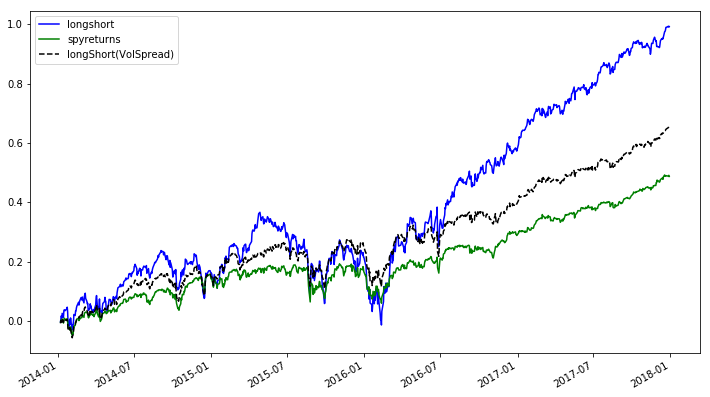

In [306]:
#Graphical Analysis
longshort4.plot(color='b')
SP500_5.plot(color = 'g')
longshort5.plot(style= 'k--', label = 'longShort(VolSpread)', figsize=(12,7))
plt.legend()
plt.show()

The Vol Spread lon short does much better than both. The VRP based portfolio has extremely large losses in 2016

In [232]:
companies1 = data1.index.unique(level = 'secid')
len(companies1)

885